Nscore (Real) is NEO-FFI-R Neuroticism

Escore (Real) is NEO-FFI-R Extraversion

Oscore (Real) is NEO-FFI-R Openness to experience.

Ascore (Real) is NEO-FFI-R Agreeableness.

Cscore (Real) is NEO-FFI-R Conscientiousness.

Impulsive (Real) is impulsiveness measured by BIS-11

SS (Real) is sensation seeing measured by ImpSS

Alcohol: alcohol consumption

Amphet: amphetamines consumption

Amyl: nitrite consumption

Benzos: benzodiazepine consumption

Caff: caffeine consumption

Cannabis: marijuana consumption

Choc: chocolate consumption

Coke: cocaine consumption

Crack: crack cocaine consumption

Ecstasy: ecstasy consumption

Heroin: heroin consumption

Ketamine: ketamine consumption

Legalh: legal highs consumption

LSD: LSD consumption

Meth: methadone consumption

Mushroom: magic mushroom consumption

Nicotine: nicotine consumption

Semer: class of fictitious drug Semeron consumption (i.e. control)

VSA: class of volatile substance abuse consumption

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import (confusion_matrix, accuracy_score)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score

from numpy import mean
from numpy import absolute
from numpy import sqrt
from sklearn.utils import resample
from itertools import combinations
from sklearn import linear_model

In [2]:
#Data cleaning - getting rid of missing values
df = pd.read_csv('Drug_Consumption.csv')
#drop missing data
df.dropna(inplace = True)

display(df)
print(df.dtypes)


ID    Age Gender                                          Education  \
0        2  25-34      M                                   Doctorate degree   
1        3  35-44      M                  Professional certificate/ diploma   
2        4  18-24      F                                     Masters degree   
3        5  35-44      F                                   Doctorate degree   
4        6    65+      F                            Left school at 18 years   
...    ...    ...    ...                                                ...   
1879  1884  18-24      F  Some college or university, no certificate or ...   
1880  1885  18-24      M  Some college or university, no certificate or ...   
1881  1886  25-34      F                                  University degree   
1882  1887  18-24      F  Some college or university, no certificate or ...   
1883  1888  18-24      M  Some college or university, no certificate or ...   

                  Country Ethnicity   Nscore   Escore   Oscore   AScore  ...  \
0                      UK     White -0.67825  1.93886  1.43533  0.76096  ...   
1                      UK     White -0.46725  0.80523 -0.84732 -1.62090  ...   
2                      UK     White -0.14882 -0.80615 -0.01928  0.59042  ...   
3                      UK     White  0.73545 -1.63340 -0.45174 -0.30172  ...   
4                  Canada     White -0.67825 -0.30033 -1.55521  2.03972  ...   
...                   ...       ...      ...      ...      ...      ...  ...   
1879                  USA     White -1.19430  1.74091  1.88511  0.76096  ...   
1880                  USA     White -0.24649  1.74091  0.58331  0.76096  ...   
1881                  USA     White  1.13281 -1.37639 -1.27553 -1.77200  ...   
1882                  USA     White  0.91093 -1.92173  0.29338 -1.62090  ...   
1883  Republic of Ireland     White -0.46725  2.12700  1.65653  1.11406  ...   

      Ecstasy  Heroin  Ketamine Legalh  LSD Meth Mushrooms Nicotine Semer  VSA  
0         CL4     CL0       CL2    CL0  CL2  CL3       CL0      CL4   CL0  CL0  
1         CL0     CL0       CL0    CL0  CL0  CL0       CL1      CL0   CL0  CL0  
2         CL0     CL0       CL2    CL0  CL0  CL0       CL0      CL2   CL0  CL0  
3         CL1     CL0       CL0    CL1  CL0  CL0       CL2      CL2   CL0  CL0  
4         CL0     CL0       CL0    CL0  CL0  CL0       CL0      CL6   CL0  CL0  
...       ...     ...       ...    ...  ...  ...       ...      ...   ...  ...  
1879      CL0     CL0       CL0    CL3  CL3  CL0       CL0      CL0   CL0  CL5  
1880      CL2     CL0       CL0    CL3  CL5  CL4       CL4      CL5   CL0  CL0  
1881      CL4     CL0       CL2    CL0  CL2  CL0       CL2      CL6   CL0  CL0  
1882      CL3     CL0       CL0    CL3  CL3  CL0       CL3      CL4   CL0  CL0  
1883      CL3     CL0       CL0    CL3  CL3  CL0       CL3      CL6   CL0  CL2  

[1884 rows x 32 columns]

ID             int64
Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
AScore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Mushrooms     object
Nicotine      object
Semer         object
VSA           object
dtype: object


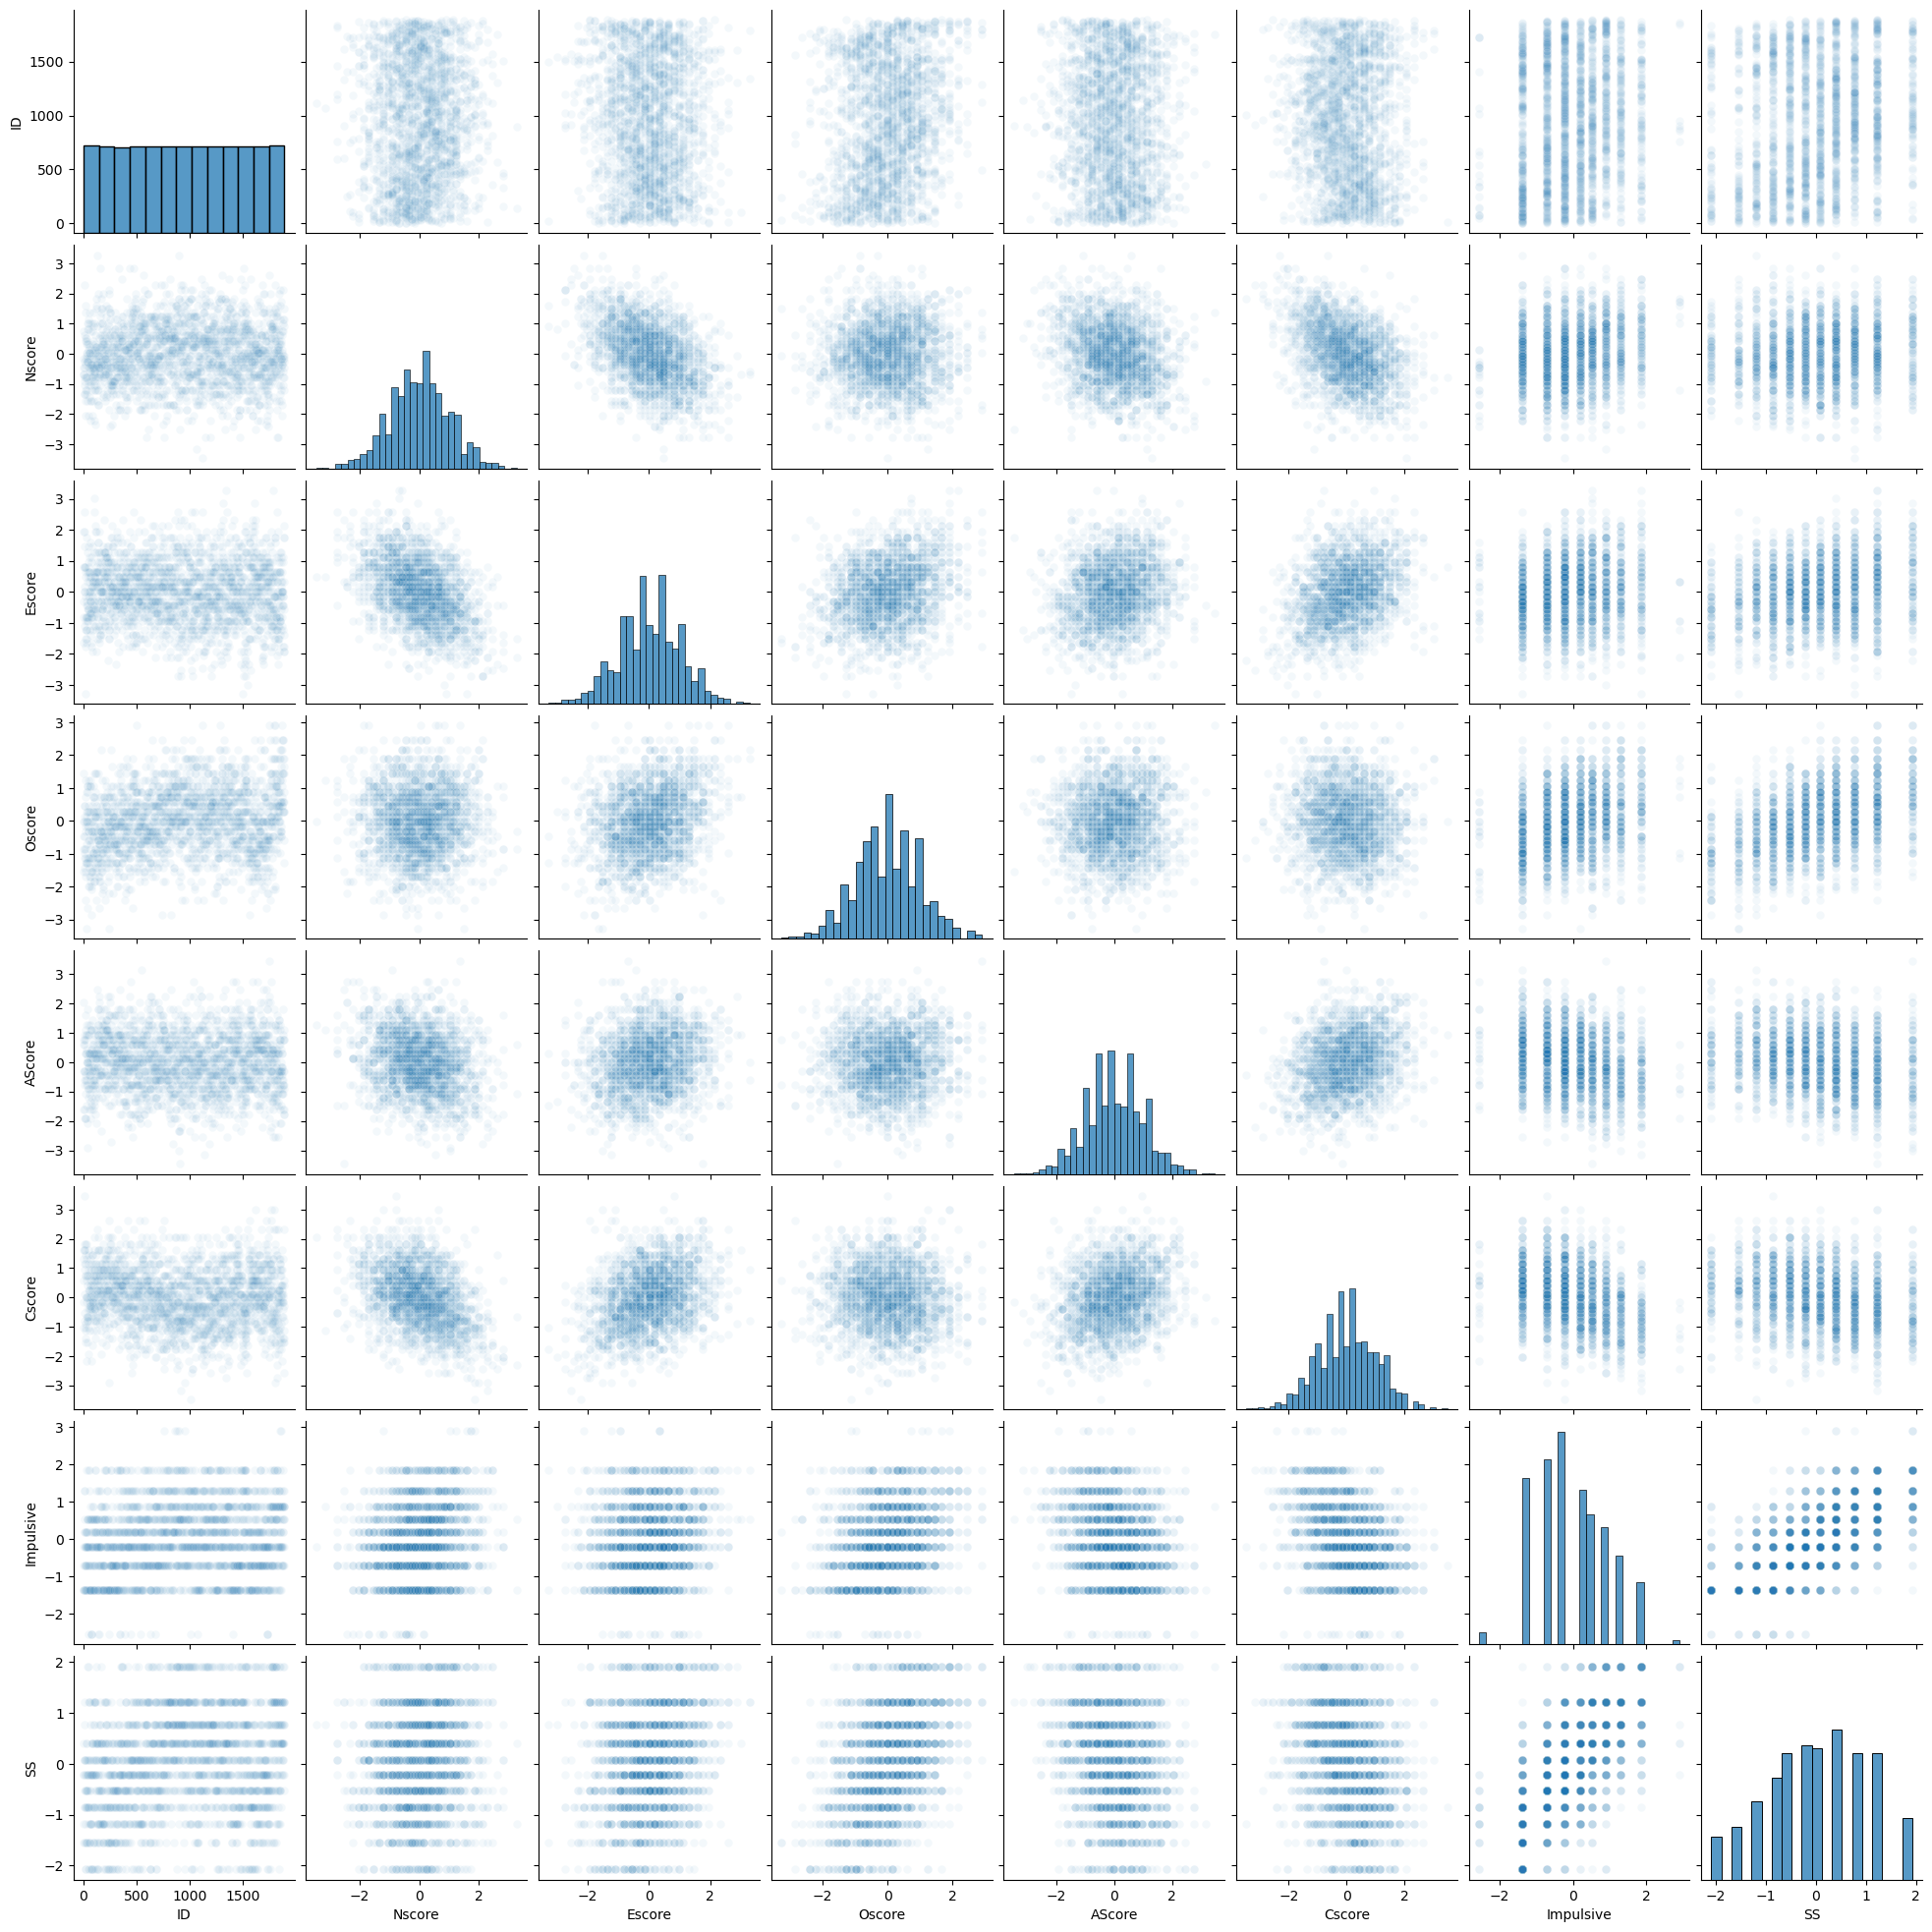

In [3]:
sns.pairplot(df, plot_kws={'alpha': 0.05})
plt.show()

In [4]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:>

In [5]:
print(df.Education.unique())
education = []
# Iterate over the values in the specified column and append them to the list
# 5- degree'
# 4 -'Masters degree'
# 3- 'University degree' 
# 2 - 'Professional certificate/ diploma' 
# 1 -'Some college or university, no certificate or degree'
#0 - 'Left school at 18 years', 'Left school at 16 years', 'Left school before 16 years', 'Left school at 17 years'

for edu in df['Education']:
    if (edu == 'Doctorate degree'):
        education.append(5)
    elif(edu == 'Masters degree'):
        education.append(4)
    elif(edu == 'University degree'):
        education.append(3)
    elif(edu == 'Professional certificate/ diploma'):
        education.append(2)
    elif(edu == 'Some college or university, no certificate or degree'):
        education.append(1)
    else:
        education.append(0)

df['Education2'] = education
counts = df['Education2'].value_counts()
for edu, count in counts.iteritems():
    print(edu, count)

['Doctorate degree' 'Professional certificate/ diploma' 'Masters degree'
 'Left school at 18 years' 'Left school at 16 years' 'University degree'
 'Some college or university, no certificate or degree'
 'Left school before 16 years' 'Left school at 17 years']
1 506
3 480
4 283
2 269
0 257
5 89


In [6]:
print(df.Alcohol.unique())
alc = []
#encoding dummy variable 
# 1 = taken within the last day (CL6)
# 0 = everything else 
for alcohol in df['Alcohol']:
    if (alcohol == 'CL6'):
        alc.append(1)
    else:
        alc.append(0)    
df['Alcohol2'] = alc
counts = df['Alcohol2'].value_counts()
for alcohol, count in counts.iteritems():
    print(alcohol, count)

['CL5' 'CL6' 'CL4' 'CL2' 'CL1' 'CL0' 'CL3']
0 1379
1 505


In [7]:
meth = []
#encoding dummy variable 
# 1 = taken within the last month (CL4-6)
# 0 = everything else 
for me in df['Meth']:
    if me in ('CL6', 'CL5', 'CL4'):
        meth.append(1)
    else:
        meth.append(0)   
df['Meth2'] = meth
counts = df['Meth2'].value_counts()
for met, count in counts.iteritems():
    print(met, count)

0 1713
1 171


In [8]:
heroin = []
#encoding dummy variable 
# 1 = taken within the last month (CL4-6)
# 0 = everything else 
for he in df['Heroin']:
    if he in ('CL6', 'CL5', 'CL4'):
        heroin.append(1)
    else:
        heroin.append(0)  
df['Heroin2'] = heroin
counts = df['Heroin2'].value_counts()
for her, count in counts.iteritems():
    print(her, count)

0 1831
1 53


In [9]:
#gender encoding
genderDummies = []
# Iterate over the values in the specified column and append them to the list
# 0 = male
# 1 = female

for g in df['Gender']:
    if (g == 'M'):
        genderDummies.append(0)
    else:
        genderDummies.append(1)

df['Gender2'] = genderDummies
counts = df['Gender2'].value_counts()
for g, count in counts.iteritems():
    print(g, count)

0 943
1 941


In [10]:
#cannabis encoding
print(df.Cannabis.unique())
cannabisDummies = []
# Iterate over the values in the specified column and append them to the list
# 1 = CL5 and more frequent (has used before and more frequent)
# 0 = CL0 never used before 


for i in df['Cannabis']:
    if i in ('CL0', 'CL1', 'CL2'):
        cannabisDummies.append(0)
    else:
        cannabisDummies.append(1)
df['Cannabis2'] = cannabisDummies
counts = df['Cannabis2'].value_counts()
for g, count in counts.iteritems():
    print(g, count)

['CL4' 'CL3' 'CL2' 'CL0' 'CL1' 'CL6' 'CL5']
1 999
0 885


# Vizualizations 

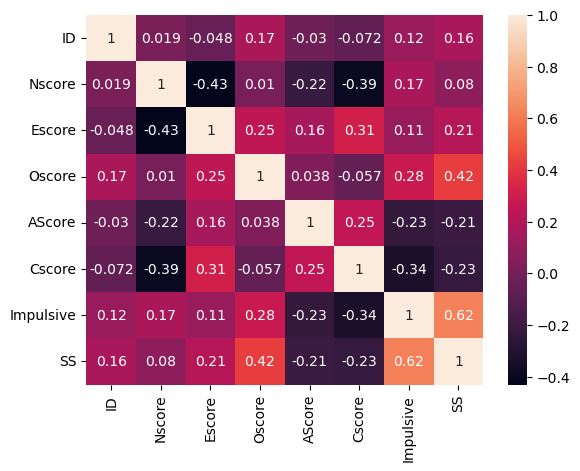

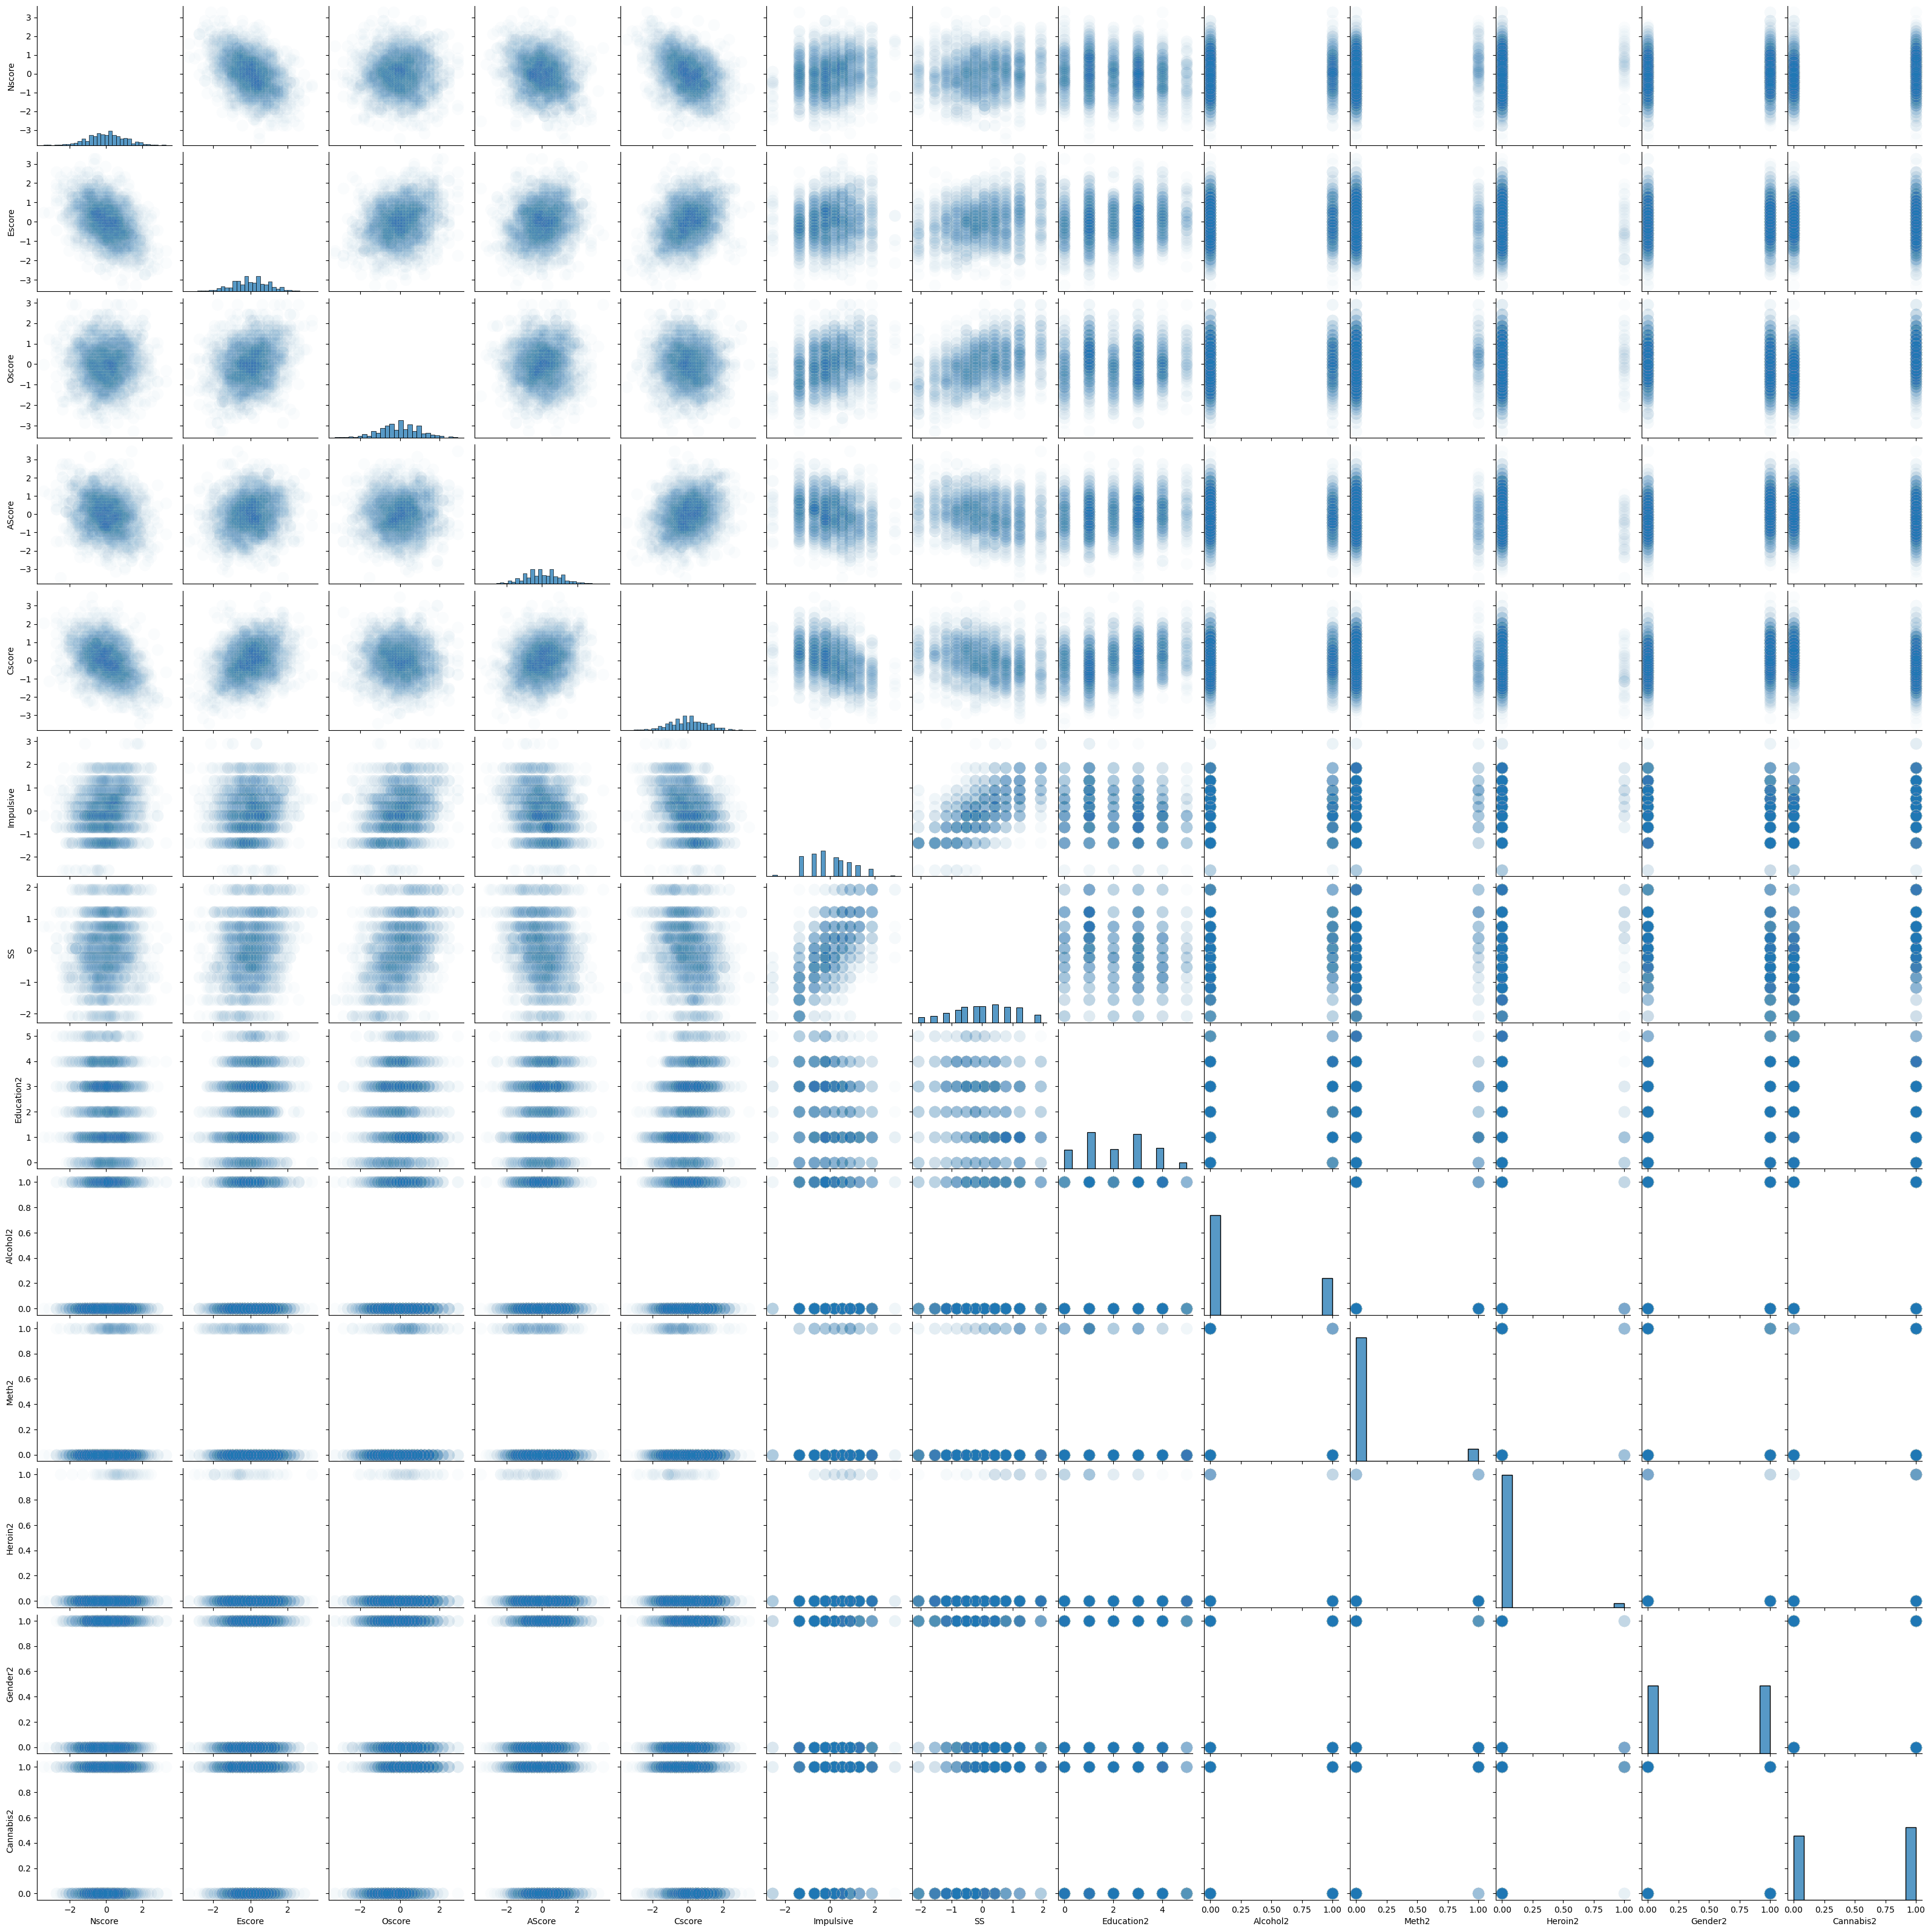

<AxesSubplot:>

In [11]:
df = df.drop('ID', axis=1)
sns.pairplot(df, plot_kws={'alpha': 0.02, 's':200})
plt.show()
corr = df.corr()
sns.heatmap(df.corr(), annot=True)

Gender  Education  Alcohol  Meth  Heroin  Cannabis
0          0          5        0     0       0         1
1          0          2        1     0       0         1
2          1          4        0     0       0         0
3          1          5        0     0       0         1
4          1          0        0     0       0         0
...      ...        ...      ...   ...     ...       ...
1879       1          1        0     0       0         1
1880       0          1        0     1       0         1
1881       1          3        0     0       0         1
1882       1          1        0     0       0         1
1883       0          1        0     0       0         1

[1884 rows x 6 columns]

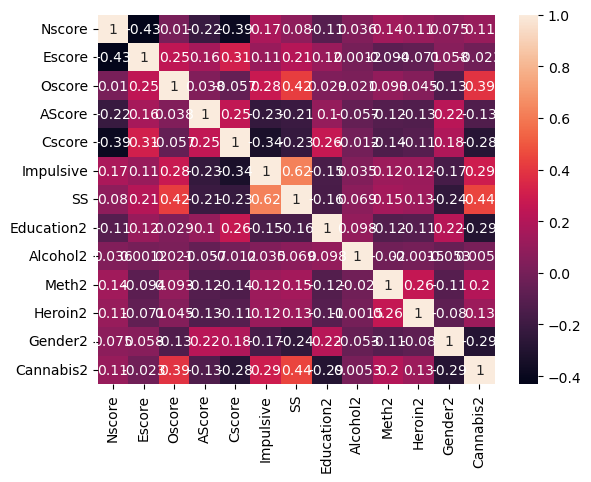

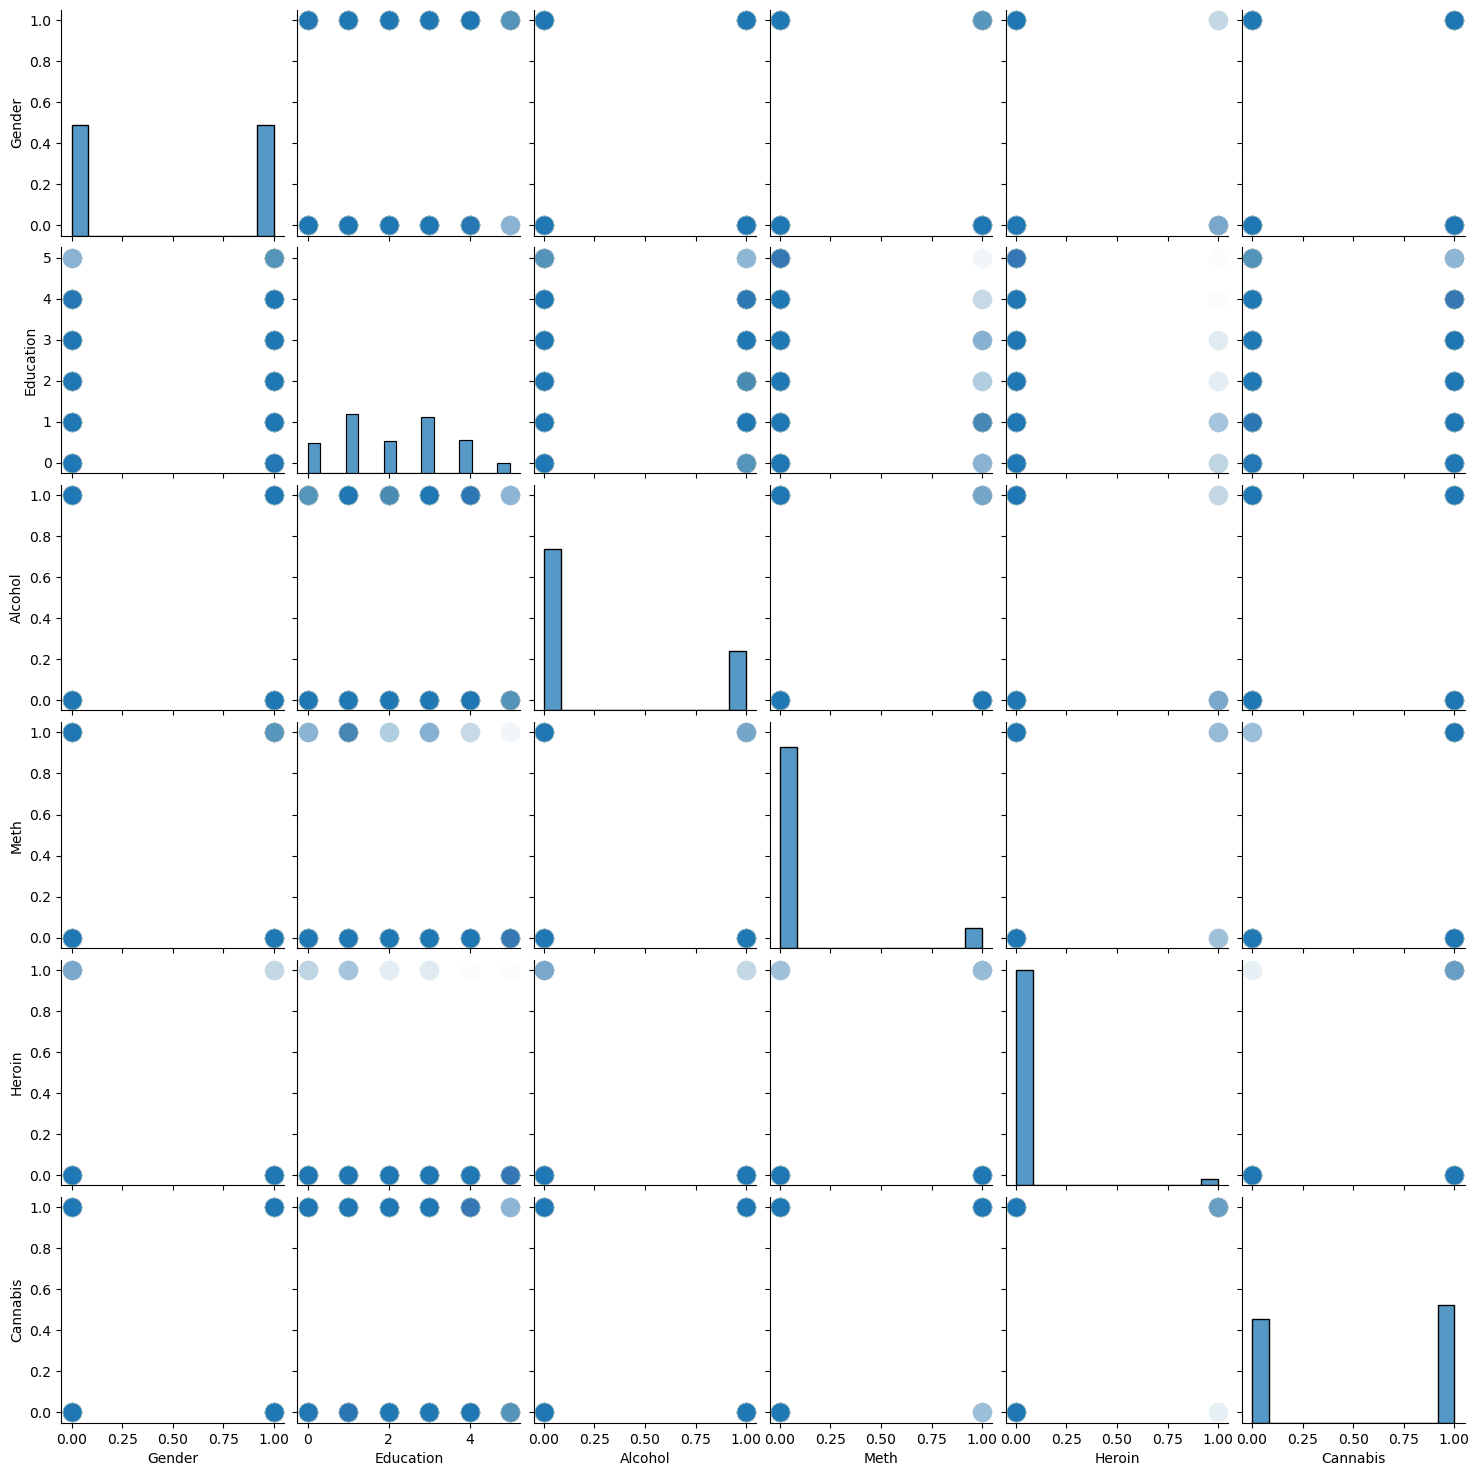

In [12]:
data2 = {'Gender':genderDummies,
        'Education': education,
       'Alcohol': alc,
       'Meth': meth,
       'Heroin':heroin,
        'Cannabis': cannabisDummies}

df2 = pd.DataFrame(data2)
display(df2)

sns.pairplot(df2, plot_kws={'alpha': 0.02, 's':200})
plt.show()

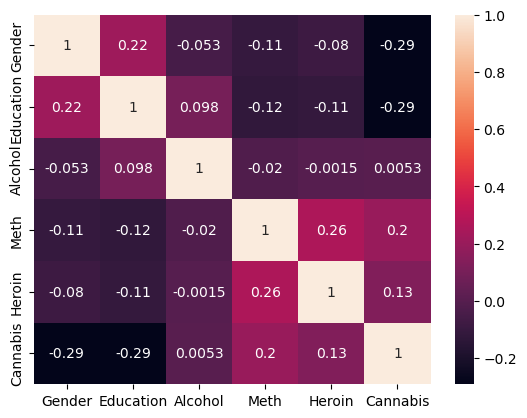

In [13]:
sns.heatmap(df2.corr(), annot=True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.33, random_state = 1)
print(train.columns)

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA', 'Education2', 'Alcohol2', 'Meth2',
       'Heroin2', 'Gender2', 'Cannabis2'],
      dtype='object')


# Alcohol Analysis

In [15]:
#Training With Random Forest
from sklearn.ensemble import RandomForestClassifier
columns = [ 'Gender2', 'Education2', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS']
X = train[columns]
Y = train['Alcohol2']

model = RandomForestClassifier(random_state=1)
model.fit(X, Y)

predictions = model.predict(X)
predictions = list(map(round, predictions))
cm = confusion_matrix(Y, predictions) 
tn, fp, fn, tp =cm.ravel()
print ("Training Confusion Matrix : \n", cm) 
print('Training accuracy = ', accuracy_score(Y, predictions))
print('TPR = {}'.format(tp/(tp + fn)))

Training Confusion Matrix : 
 [[934   0]
 [  0 328]]
Training accuracy =  1.0
TPR = 1.0


Test Confusion Matrix : 
 [[429  16]
 [171   6]]
Test accuracy =  0.6993569131832797
TPR = 0.03389830508474576
Gender2 0.025060725910358954
Education2 0.06881341342803847
Nscore 0.14988837819196638
Escore 0.14468145120299394
Oscore 0.1427937362556942
AScore 0.1442062337282837
Cscore 0.14298513587372444
Impulsive 0.08475900329017234
SS 0.09681192211876764


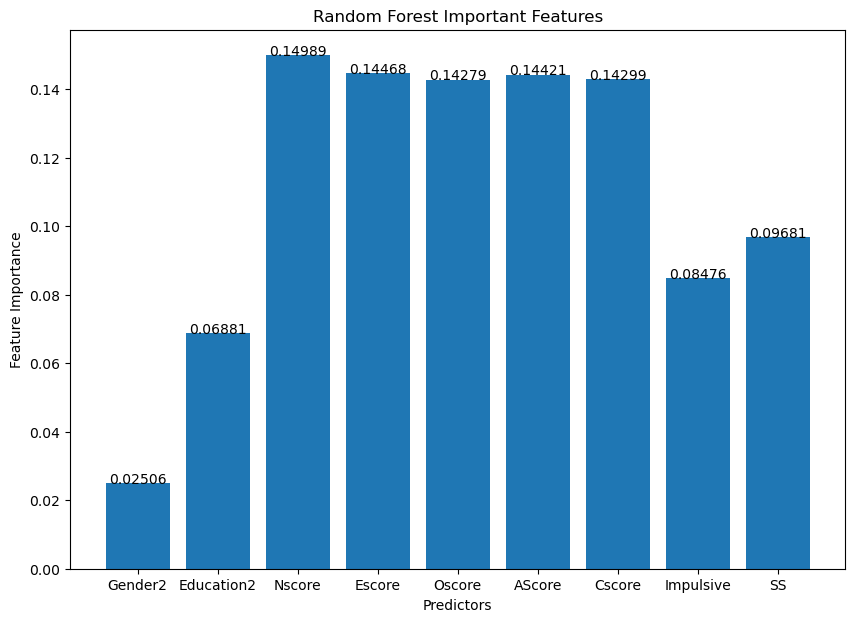

In [16]:
#testing with test set
from sklearn.metrics import (confusion_matrix, accuracy_score)
predictions = model.predict(test[columns])
predictions = list(map(round, predictions))
cm = confusion_matrix(test['Alcohol2'], predictions) 
tn, fp, fn, tp =cm.ravel()
print ("Test Confusion Matrix : \n", cm) 
print('Test accuracy = ', accuracy_score(test['Alcohol2'], predictions))
print('TPR = {}'.format(tp/(tp + fn)))

feature_importances = np.mean([
    tree.feature_importances_ for tree in model.estimators_
], axis=0)
for i in range(len(feature_importances)):
    print(columns[i], feature_importances[i])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
fig = plt.figure(figsize = (10,7))
plt.bar(['Gender2', 'Education2', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS'], feature_importances)
addlabels(['Gender2', 'Education2', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS'], np.round(feature_importances,5))
plt.ylabel("Feature Importance")
plt.xlabel('Predictors')
plt.title('Random Forest Important Features')
plt.show()

In [17]:
# KNN w/ Cross Validation
import warnings   
warnings.filterwarnings("ignore")
accuracies = []
max_val = 0
best_k = 0
X = df[columns]
Y = df['Alcohol2']
for k in range(1, 201):
    
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
    score = mean(scores)

    accuracies.append(score)
    
    if max_val < score:
        max_val = score
        best_k = k
    
print('Accuracy:{} K:{}'.format(max_val, best_k))
plt.plot(range(1, 201), accuracies)

Accuracy:0.7330181245074863 K:34


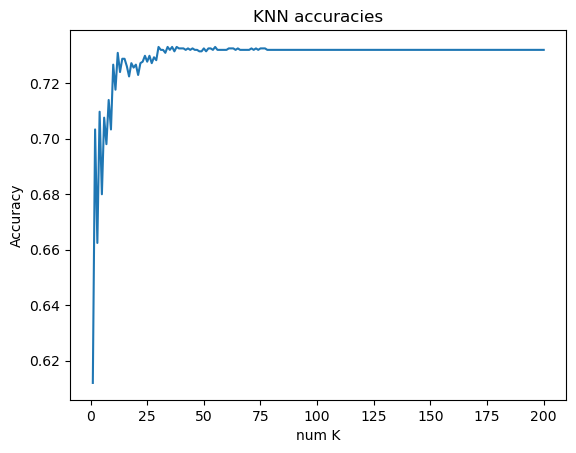

In [18]:
#KNN optimal graph
plt.ylabel("Accuracy")
plt.xlabel('num K')
plt.title('KNN accuracies')
plt.show()

Score 0.7314251941911516
[[-0.29521311  0.20856802  0.10934905  0.00911174 -0.05117314 -0.07615186
   0.00894263 -0.03911545  0.19944536]]
Feature: 0, Score: -0.29521
Feature: 1, Score: 0.20857
Feature: 2, Score: 0.10935
Feature: 3, Score: 0.00911
Feature: 4, Score: -0.05117
Feature: 5, Score: -0.07615
Feature: 6, Score: 0.00894
Feature: 7, Score: -0.03912
Feature: 8, Score: 0.19945


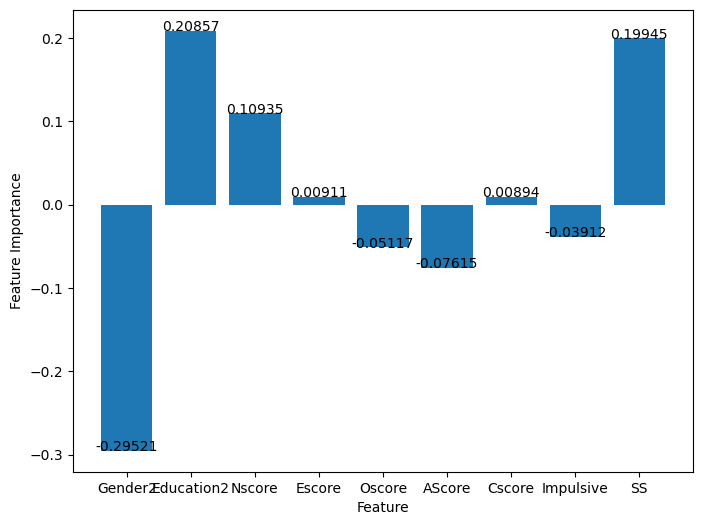

In [19]:
# Alcohol LDA w/ Cross Validation and Feature Importance
model = LinearDiscriminantAnalysis()
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('Score {}'.format(mean(scores)))

model = LinearDiscriminantAnalysis().fit(X, Y)

importance = model.coef_
coefficients = importance[0]
print(importance)
for i,v in enumerate(coefficients):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(columns, coefficients)
addlabels(columns, np.round(coefficients,5))
plt.ylabel("Feature Importance")
plt.xlabel('Feature')

plt.show()

In [20]:
# Alcohol QDA w/ Cross Validation
model = QuadraticDiscriminantAnalysis(store_covariance = True)
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('Score {}'.format(mean(scores)))

Score 0.7223910840932117


### Removing Features Based off the Random Forest

In [21]:
#Removed Gender, Education, and SS
#Random Forest
columns = ['Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive']
X = train[columns]
Y = train['Alcohol2']

model = RandomForestClassifier(random_state=1)
model.fit(X, Y)

predictions = model.predict(X)
predictions = list(map(round, predictions))
cm = confusion_matrix(Y, predictions) 
tn, fp, fn, tp =cm.ravel()
print ("Training Confusion Matrix : \n", cm) 
print('Training accuracy = ', accuracy_score(Y, predictions))
print('TPR = {}'.format(tp/(tp + fn)))

Training Confusion Matrix : 
 [[934   0]
 [  0 328]]
Training accuracy =  1.0
TPR = 1.0


Test Confusion Matrix : 
 [[427  18]
 [167  10]]
Test accuracy =  0.702572347266881
TPR = 0.05649717514124294
Nscore 0.18455550339801044
Escore 0.17333021469181634
Oscore 0.18212496787067728
AScore 0.17423983933280532
Cscore 0.1778312703204803
Impulsive 0.10791820438621019


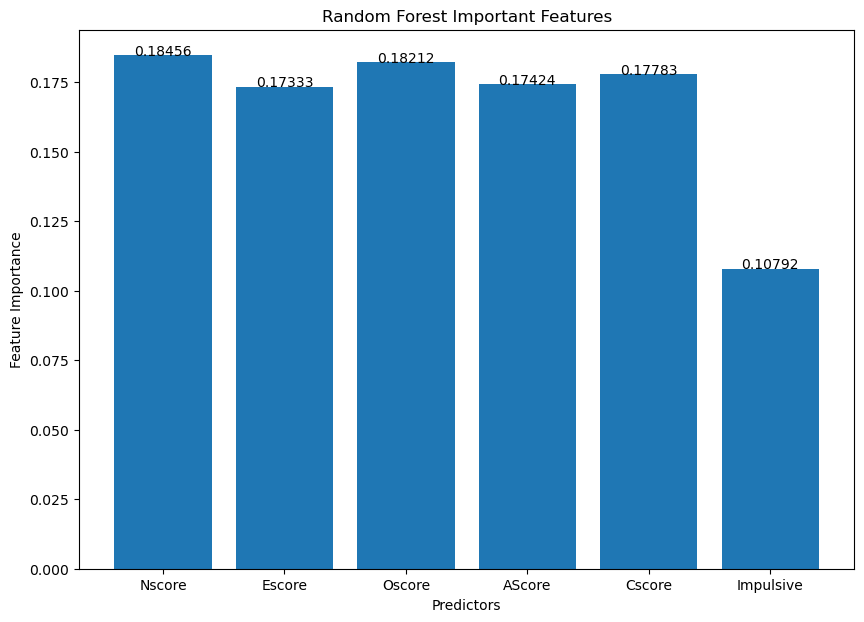

In [22]:
#test set
predictions = model.predict(test[columns])
predictions = list(map(round, predictions))
cm = confusion_matrix(test['Alcohol2'], predictions) 
tn, fp, fn, tp =cm.ravel()
print ("Test Confusion Matrix : \n", cm) 
print('Test accuracy = ', accuracy_score(test['Alcohol2'], predictions))
print('TPR = {}'.format(tp/(tp + fn)))

feature_importances = np.mean([
    tree.feature_importances_ for tree in model.estimators_
], axis=0)
for i in range(len(feature_importances)):
    print(columns[i], feature_importances[i])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
fig = plt.figure(figsize = (10,7))
plt.bar(columns, feature_importances)
addlabels(columns, np.round(feature_importances,5))
plt.ylabel("Feature Importance")
plt.xlabel('Predictors')
plt.title('Random Forest Important Features')
plt.show()

Accuracy:0.7319571090847686 K:60


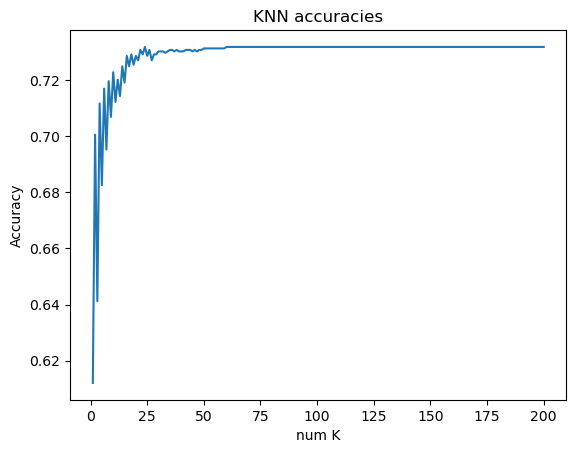

In [23]:
# KNN w/ Cross Validation
accuracies = []
max_val = 0
best_k = 0
X = df[columns]
Y = df['Alcohol2']
for k in range(1, 201):
    
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
    score = mean(scores)

    accuracies.append(score)
    
    if max_val < score:
        max_val = score
        best_k = k
    
print('Accuracy:{} K:{}'.format(max_val, best_k))
plt.plot(range(1, 201), accuracies)
#KNN optimal graph
plt.ylabel("Accuracy")
plt.xlabel('num K')
plt.title('KNN accuracies')
plt.show()

Score 0.7319571090847686
[[ 0.07692194  0.02951832  0.03470329 -0.11956518  0.03946133  0.04117552]]
Feature: 0, Score: 0.07692
Feature: 1, Score: 0.02952
Feature: 2, Score: 0.03470
Feature: 3, Score: -0.11957
Feature: 4, Score: 0.03946
Feature: 5, Score: 0.04118


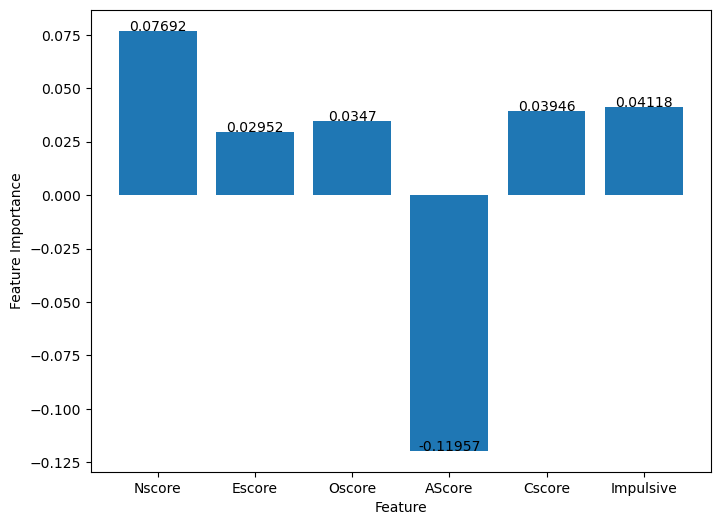

QDA Score 0.7298322638748171


In [24]:
# Alcohol LDA w/ Cross Validation and Feature Importance
model = LinearDiscriminantAnalysis()
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('Score {}'.format(mean(scores)))

model = LinearDiscriminantAnalysis().fit(X, Y)

importance = model.coef_
coefficients = importance[0]
print(importance)
for i,v in enumerate(coefficients):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(columns, coefficients)
addlabels(columns, np.round(coefficients,5))
plt.ylabel("Feature Importance")
plt.xlabel('Feature')

plt.show()
# Alcohol QDA w/ Cross Validation
model = QuadraticDiscriminantAnalysis(store_covariance = True)
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('QDA Score {}'.format(mean(scores)))

### Removing features based on LDA feature importance

In [25]:
#Removed Gender, A score, O score, impulsive
#Random Forest
columns = [ 'Education2', 'Nscore',
       'Escore', 'Cscore', 'SS']
X = train[columns]
Y = train['Alcohol2']

model = RandomForestClassifier(random_state=1)
model.fit(X, Y)

predictions = model.predict(X)
predictions = list(map(round, predictions))
cm = confusion_matrix(Y, predictions) 
tn, fp, fn, tp =cm.ravel()
print ("Training Confusion Matrix : \n", cm) 
print('Training accuracy = ', accuracy_score(Y, predictions))
print('TPR = {}'.format(tp/(tp + fn)))

Training Confusion Matrix : 
 [[934   0]
 [  1 327]]
Training accuracy =  0.9992076069730587
TPR = 0.9969512195121951


Test Confusion Matrix : 
 [[408  37]
 [161  16]]
Test accuracy =  0.6816720257234726
TPR = 0.0903954802259887
Education2 0.10234119152214995
Nscore 0.2516586814607611
Escore 0.23862701027467445
Cscore 0.24396487720337656
SS 0.16340823953903785


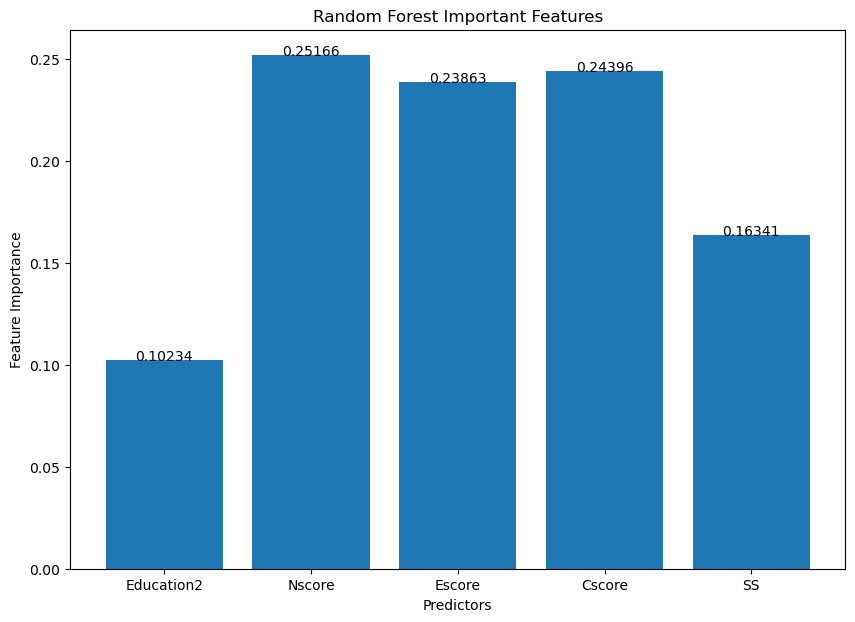

In [26]:
#test set
predictions = model.predict(test[columns])
predictions = list(map(round, predictions))
cm = confusion_matrix(test['Alcohol2'], predictions) 
tn, fp, fn, tp =cm.ravel()
print ("Test Confusion Matrix : \n", cm) 
print('Test accuracy = ', accuracy_score(test['Alcohol2'], predictions))
print('TPR = {}'.format(tp/(tp + fn)))

feature_importances = np.mean([
    tree.feature_importances_ for tree in model.estimators_
], axis=0)
for i in range(len(feature_importances)):
    print(columns[i], feature_importances[i])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
fig = plt.figure(figsize = (10,7))
plt.bar(columns, feature_importances)
addlabels(columns, np.round(feature_importances,5))
plt.ylabel("Feature Importance")
plt.xlabel('Predictors')
plt.title('Random Forest Important Features')
plt.show()

Accuracy:0.7335444106720703 K:37


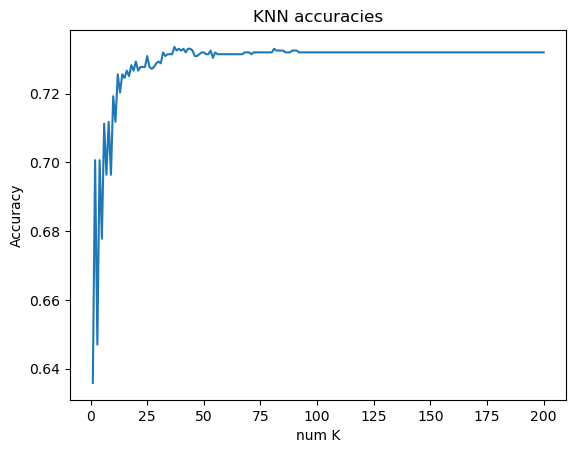

In [27]:
# KNN w/ Cross Validation
accuracies = []
max_val = 0
best_k = 0
X = df[columns]
Y = df['Alcohol2']
for k in range(1, 201):
    
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
    score = mean(scores)

    accuracies.append(score)
    
    if max_val < score:
        max_val = score
        best_k = k
    
print('Accuracy:{} K:{}'.format(max_val, best_k))
plt.plot(range(1, 201), accuracies)
#KNN optimal graph
plt.ylabel("Accuracy")
plt.xlabel('num K')
plt.title('KNN accuracies')
plt.show()

Score 0.7319571090847686
[[ 0.18895443  0.07680506 -0.03464066 -0.01131842  0.20862528]]
Feature: 0, Score: 0.18895
Feature: 1, Score: 0.07681
Feature: 2, Score: -0.03464
Feature: 3, Score: -0.01132
Feature: 4, Score: 0.20863


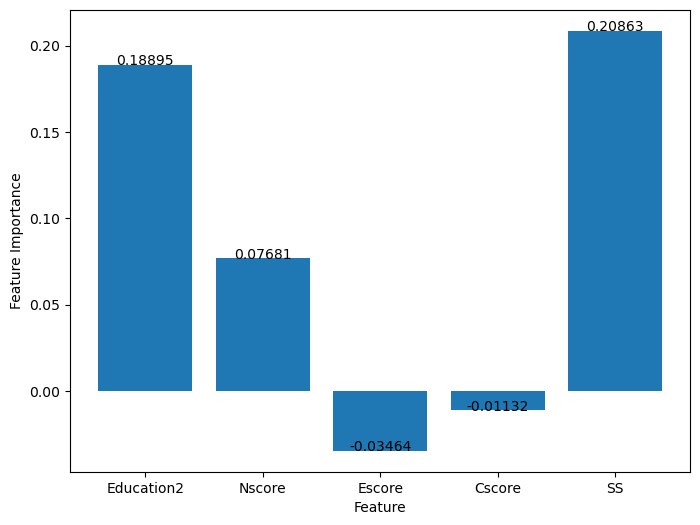

QDA Score 0.7314280085556681


In [28]:
# Alcohol LDA w/ Cross Validation and Feature Importance
model = LinearDiscriminantAnalysis()
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('Score {}'.format(mean(scores)))

model = LinearDiscriminantAnalysis().fit(X, Y)

importance = model.coef_
coefficients = importance[0]
print(importance)
for i,v in enumerate(coefficients):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(columns, coefficients)
addlabels(columns, np.round(coefficients,5))
plt.ylabel("Feature Importance")
plt.xlabel('Feature')

plt.show()
# Alcohol QDA w/ Cross Validation
model = QuadraticDiscriminantAnalysis(store_covariance = True)
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('QDA Score {}'.format(mean(scores)))

# Meth Analysis

In [29]:
columns = [ 'Gender2', 'Education2', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Cannabis2']
X = train[columns]
Y = train['Meth2']

In [30]:
#Random Forest
model = RandomForestClassifier(random_state=1)
model.fit(X, Y)

predictions = model.predict(X)
predictions = list(map(round, predictions))
cm = confusion_matrix(Y, predictions) 
tn, fp, fn, tp =cm.ravel()
print ("Training Confusion Matrix : \n", cm) 
print('Training accuracy = ', accuracy_score(Y, predictions))
print('TPR = {}'.format(tp/(tp + fn)))

Training Confusion Matrix : 
 [[1149    0]
 [   0  113]]
Training accuracy =  1.0
TPR = 1.0


Test Confusion Matrix : 
 [[563   1]
 [ 57   1]]
Test accuracy =  0.7154340836012861
TPR = 0.017241379310344827
Gender2 0.025487346901258555
Education2 0.06679233304845503
Nscore 0.14094573892832785
Escore 0.13552235615410424
Oscore 0.13348181606014986
AScore 0.14952194076315684
Cscore 0.13779537537607095
Impulsive 0.09257429232398008
SS 0.09336913466932448
Cannabis2 0.0245096657751722


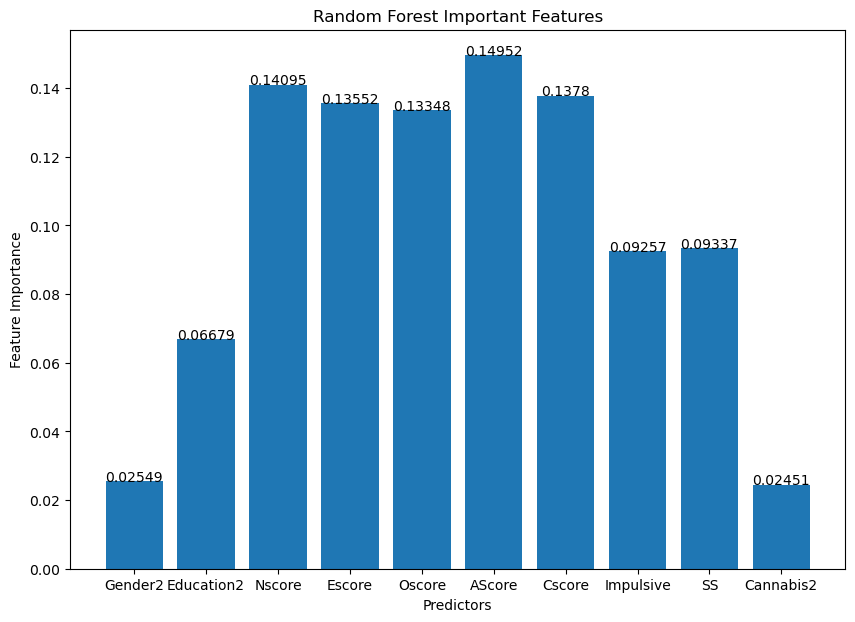

In [31]:
#testing with test set
from sklearn.metrics import (confusion_matrix, accuracy_score)
predictions = model.predict(test[columns])
predictions = list(map(round, predictions))
cm = confusion_matrix(test['Meth2'], predictions) 
tn, fp, fn, tp =cm.ravel()
print ("Test Confusion Matrix : \n", cm) 
print('Test accuracy = ', accuracy_score(test['Alcohol2'], predictions))
print('TPR = {}'.format(tp/(tp + fn)))

feature_importances = np.mean([
    tree.feature_importances_ for tree in model.estimators_
], axis=0)
for i in range(len(feature_importances)):
    print(columns[i], feature_importances[i])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
fig = plt.figure(figsize = (10,7))
plt.bar(columns, feature_importances)
addlabels(columns, np.round(feature_importances,5))
plt.ylabel("Feature Importance")
plt.xlabel('Predictors')
plt.title('Random Forest Important Features')
plt.show()

Score 0.9092367443431272
[[-0.26163157 -0.12033341  0.29671932 -0.23219605  0.1212938  -0.18241704
  -0.02004192  0.03227163  0.23756687  0.88039596]]
Feature: 0, Score: -0.26163
Feature: 1, Score: -0.12033
Feature: 2, Score: 0.29672
Feature: 3, Score: -0.23220
Feature: 4, Score: 0.12129
Feature: 5, Score: -0.18242
Feature: 6, Score: -0.02004
Feature: 7, Score: 0.03227
Feature: 8, Score: 0.23757
Feature: 9, Score: 0.88040


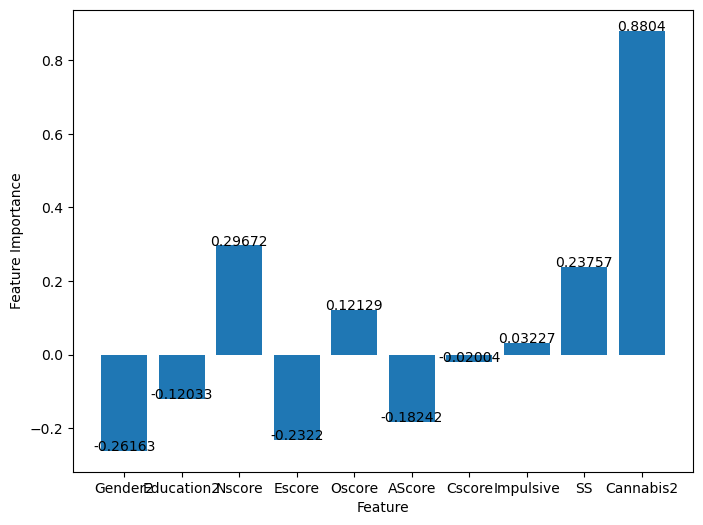

In [32]:
# Meth LDA w/ Cross Validation and Feature Importance
model = LinearDiscriminantAnalysis()
X = df[columns]
Y = df['Meth2']
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('Score {}'.format(mean(scores)))

model = LinearDiscriminantAnalysis().fit(X, Y)

importance = model.coef_
coefficients = importance[0]
print(importance)
for i,v in enumerate(coefficients):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(columns, coefficients)
addlabels(columns, np.round(coefficients,5))
plt.ylabel("Feature Importance")
plt.xlabel('Feature')

plt.show()

In [33]:
# Meth QDA w/ Cross Validation
model = QuadraticDiscriminantAnalysis()
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('Score {}'.format(mean(scores)))

Score 0.899667904987054


## Result
Based off the three models, cannabis does not influence if someone does meth. Random forest showed that cannabis had the smallest importance. LDA negative importance, which means overall, these the models agree there is no strong connection between cannabis and meth.

# Heroin

In [34]:
columns = [ 'Gender2', 'Education2', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Cannabis2']
X = df[columns]
Y = df['Heroin2']
#Random Forest
model = RandomForestClassifier(random_state=1)
model.fit(X, Y)

predictions = model.predict(X)
predictions = list(map(round, predictions))
cm = confusion_matrix(Y, predictions) 
tn, fp, fn, tp =cm.ravel()
print ("Training Confusion Matrix : \n", cm) 
print('Training accuracy = ', accuracy_score(Y, predictions))
print('TPR = {}'.format(tp/(tp + fn)))

Training Confusion Matrix : 
 [[1831    0]
 [   0   53]]
Training accuracy =  1.0
TPR = 1.0


Test Confusion Matrix : 
 [[598   0]
 [  0  24]]
Test accuracy =  0.6961414790996785
TPR = 1.0
Gender2 0.024020461576521778
Education2 0.06693230930257435
Nscore 0.13391445124534374
Escore 0.14609068489651028
Oscore 0.1345535496109029
AScore 0.15070115801373218
Cscore 0.14413156368990557
Impulsive 0.08871898061918701
SS 0.0850879717372689
Cannabis2 0.025848869308053225


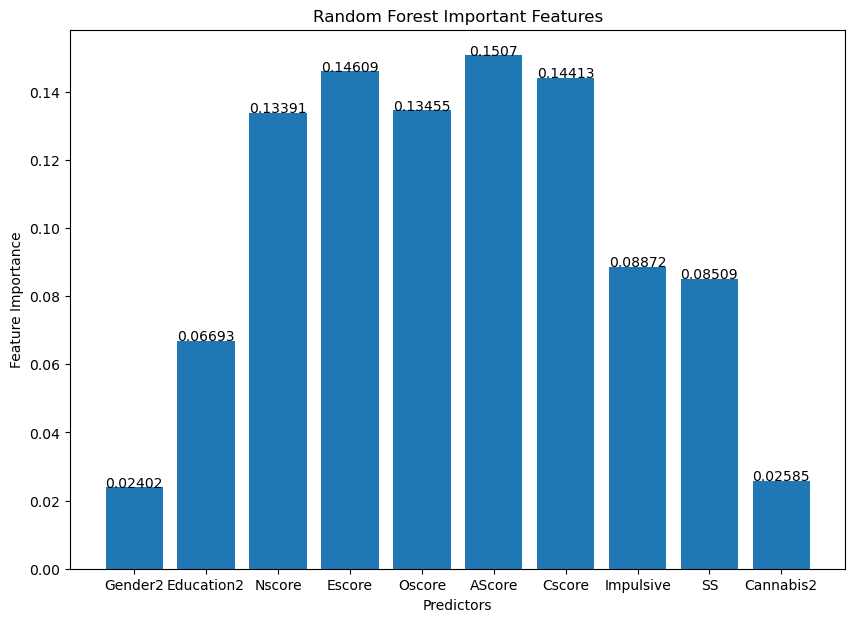

In [35]:
#testing with test set
from sklearn.metrics import (confusion_matrix, accuracy_score)
predictions = model.predict(test[columns])
predictions = list(map(round, predictions))
cm = confusion_matrix(test['Heroin2'], predictions) 
tn, fp, fn, tp =cm.ravel()
print ("Test Confusion Matrix : \n", cm) 
print('Test accuracy = ', accuracy_score(test['Alcohol2'], predictions))
print('TPR = {}'.format(tp/(tp + fn)))

feature_importances = np.mean([
    tree.feature_importances_ for tree in model.estimators_
], axis=0)
for i in range(len(feature_importances)):
    print(columns[i], feature_importances[i])

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
fig = plt.figure(figsize = (10,7))
plt.bar(columns, feature_importances)
addlabels(columns, np.round(feature_importances,5))
plt.ylabel("Feature Importance")
plt.xlabel('Predictors')
plt.title('Random Forest Important Features')
plt.show()

Score 0.9713413261285602
[[-0.22599563 -0.2570973   0.34562063 -0.28176361  0.01817249 -0.46423191
   0.02302178  0.24098119  0.37052728  0.67752629]]
Feature: 0, Score: -0.22600
Feature: 1, Score: -0.25710
Feature: 2, Score: 0.34562
Feature: 3, Score: -0.28176
Feature: 4, Score: 0.01817
Feature: 5, Score: -0.46423
Feature: 6, Score: 0.02302
Feature: 7, Score: 0.24098
Feature: 8, Score: 0.37053
Feature: 9, Score: 0.67753


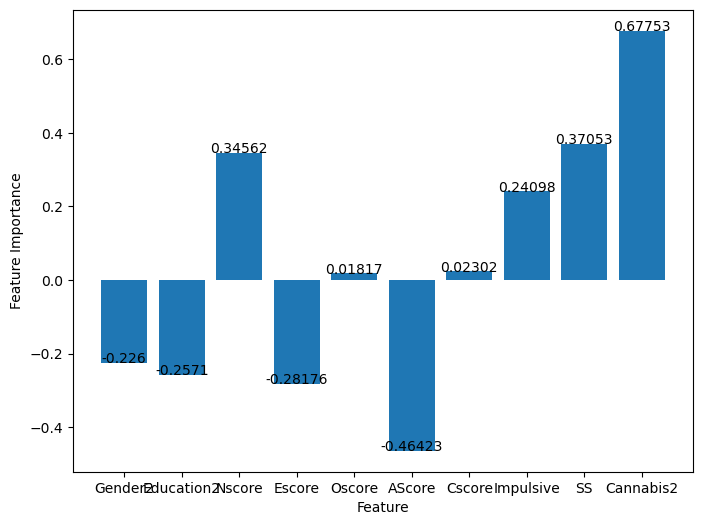

In [36]:
# Heroin LDA w/ Cross Validation and Feature Importance
model = LinearDiscriminantAnalysis()
X = df[columns]
Y = df['Heroin2']
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('Score {}'.format(mean(scores)))

model = LinearDiscriminantAnalysis().fit(X, Y)

importance = model.coef_
coefficients = importance[0]
print(importance)
for i,v in enumerate(coefficients):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(columns, coefficients)
addlabels(columns, np.round(coefficients,5))
plt.ylabel("Feature Importance")
plt.xlabel('Feature')

plt.show()

In [37]:
# Heroin QDA w/ Cross Validation
model = QuadraticDiscriminantAnalysis()
scores = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('Score {}'.format(mean(scores)))

Score 0.9708122255994598


## Result

Similar to meth, heroin yielded the same result with cannabis not having much connection to heroin use